# Pima Indians Diabetes Data Set (Kaggle)

In [1]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)
clean_df = clean_df.sample(30000)
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
429737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
551453,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
878041,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5
284975,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
953249,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4


In [3]:
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_s, y_resampled_s = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
# Counter(y_resampled_s)

In [8]:
# prepare classifier models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF2', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('RF4', RandomForestClassifier(max_depth=4, random_state=0)))
models.append(('RF6', RandomForestClassifier(max_depth=6, random_state=0)))

In [9]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_resampled_s, y_resampled_s, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.851990 (0.010193)
LDA: 0.839603 (0.030673)
KNN: 0.791966 (0.116810)
CART: 0.882273 (0.015957)
NB: 0.816842 (0.027953)
RF2: 0.821908 (0.015900)
RF4: 0.851644 (0.019971)
RF6: 0.854722 (0.022659)


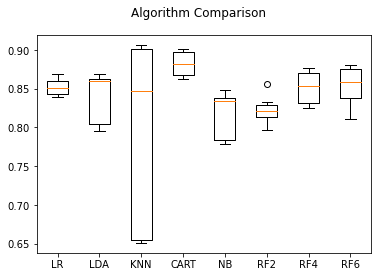

In [10]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [16]:
ExplainerDashboard(
    ClassifierExplainer(
        RandomForestClassifier().fit(X_train, y_train),
        X_test, y_test
    )
).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will s

KeyboardInterrupt: 

In [ ]:
ExplainerDashboard(explainer).run()